# RAINFALL PREDICTION AND ANALYSIS USING MACHINE LEARNING


## 1. DATA COLLECTION

In [1]:
# Importing Libraries
import pandas as pd # data manipulation and analysis
import numpy as np  # Mathematical operations on arrays

# Importing libraries for visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# Importing libraries for data pre-processing
from sklearn.preprocessing import LabelEncoder # library for categorical encoding
from sklearn.preprocessing import MinMaxScaler # library for Normalization
from imblearn.over_sampling import SMOTE # library for oversampling

from sklearn.model_selection import train_test_split # library for splitting dataset into test and train

# Importing libraries of ML Models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score

In [2]:
# Removing warnings
import warnings
warnings.filterwarnings("ignore")

### LOADING RAIN PREDICTION(.csv) DATASET

In [3]:
# Reading the raw csv dataset 
rain_prediction=pd.read_csv("D:/Machine learning/weatherAUS.csv")

## 2. EXPLORATORY DATA ANALYSIS AND VISUALISATION

In [4]:
#identifying the number of observations and artributes of the raw data
rain_prediction.shape

(145460, 23)

In [5]:
# Reading first 5 rows of the dataset
rain_prediction.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
# Reading last 5 rows of the dataset
rain_prediction.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [7]:
# Listing each columns of the dataset
rain_prediction.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# min, max count avg and percentile details of each column
rain_prediction.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [9]:
# To understand the data types of the column data
rain_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
# Dropping artributes with more null values
# Evaporation, Sunshine, Cloud9am, Cloud3pm contains more than 38% null values
rain_prediction=rain_prediction.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [11]:
#Identifying the number of rows and columns of the dataset after dropping 4 columns
rain_prediction.shape

(145460, 19)

## 1.1 UNIVARIATE ANALYSIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'BadgerysCreek'),
  Text(2, 0, 'Cobar'),
  Text(3, 0, 'CoffsHarbour'),
  Text(4, 0, 'Moree'),
  Text(5, 0, 'Newcastle'),
  Text(6, 0, 'NorahHead'),
  Text(7, 0, 'NorfolkIsland'),
  Text(8, 0, 'Penrith'),
  Text(9, 0, 'Richmond'),
  Text(10, 0, 'Sydney'),
  Text(11, 0, 'SydneyAirport'),
  Text(12, 0, 'WaggaWagga'),
  Text(13, 0, 'Williamtown'),
  Text(14, 0, 'Wollongong'),
  Text(15, 0, 'Canberra'),
  Text(16, 0, 'Tuggeranong'),
  Text(17, 0, 'MountGinini'),
  Text(18, 0, 'Ballarat'),
  Text(19, 0, 'Bendigo'),
  Text(20, 0, 'Sale'),
  Text(21, 0, 'MelbourneAirport'),
  Text(22, 0, 'Melbourne'),
  Text(23, 0, 'Mildura'),
  Text(24, 0, 'Nhil'),
  Text(25, 0, 'Portland'),
  Text(26, 0, 'Watsonia'),
  Text(27, 0, 'Dartmoor'),
  Text(28,

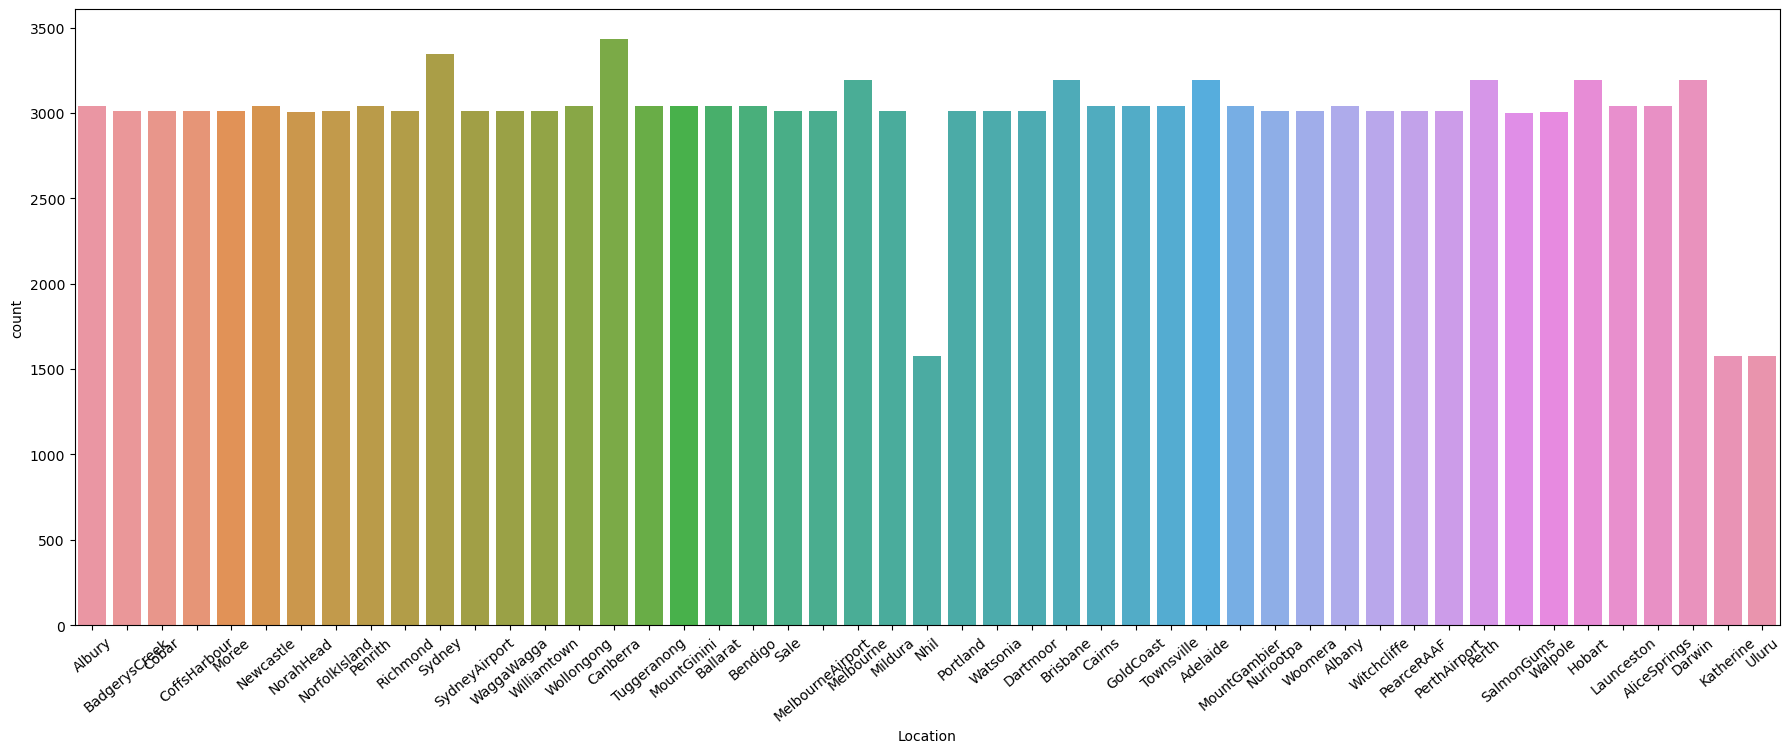

In [12]:
# countplot for the artribute 'Loction'
plt.figure(figsize=(22,8))
sns.countplot(rain_prediction['Location'])
plt.xticks(rotation=40)

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

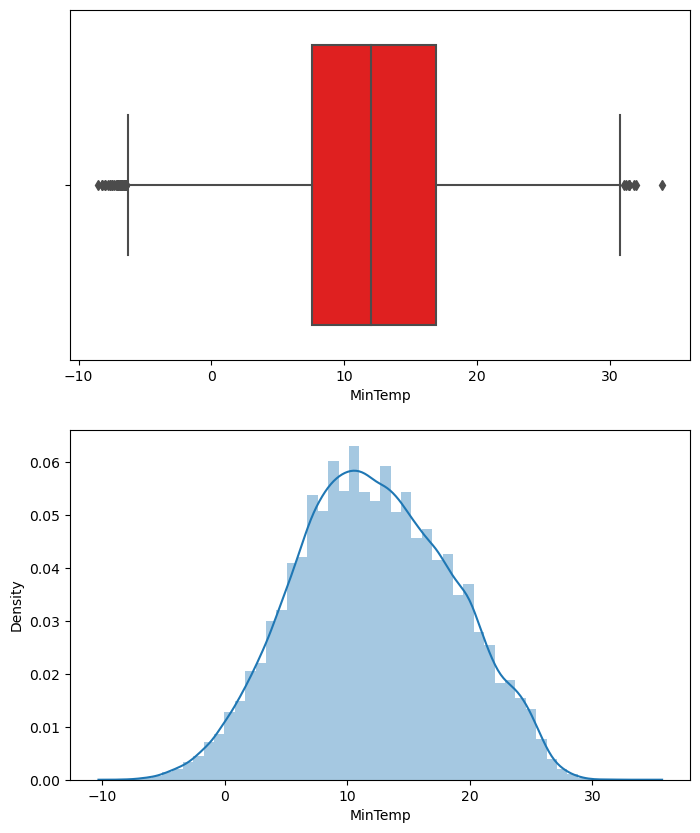

In [13]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,10))

sns.boxplot(rain_prediction['MinTemp'], color='red', ax=ax[0])

sns.distplot(rain_prediction['MinTemp'], ax=ax[1])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

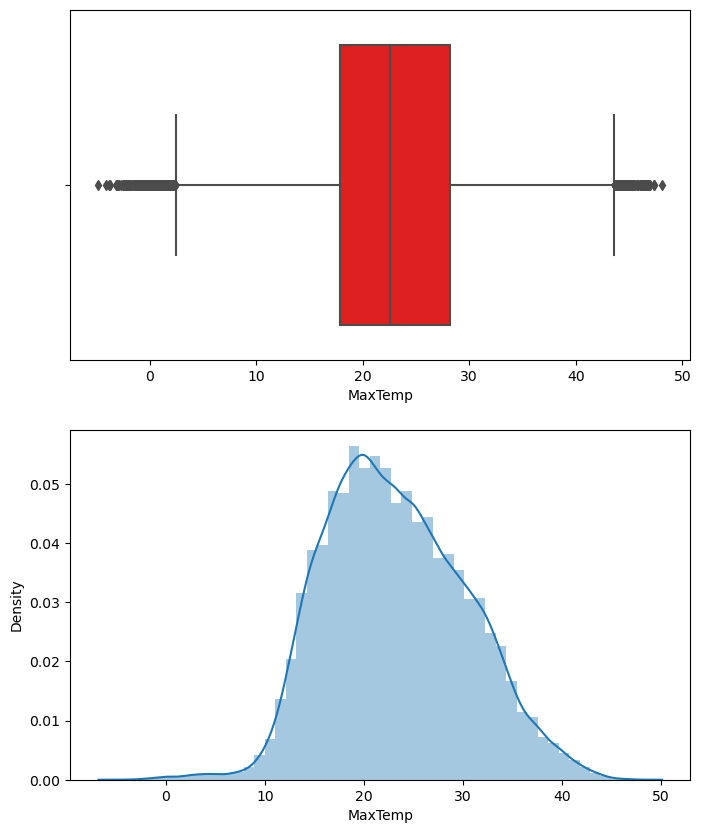

In [14]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,10))

sns.boxplot(rain_prediction['MaxTemp'], color='red', ax=ax[0])

sns.distplot(rain_prediction['MaxTemp'], ax=ax[1])

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

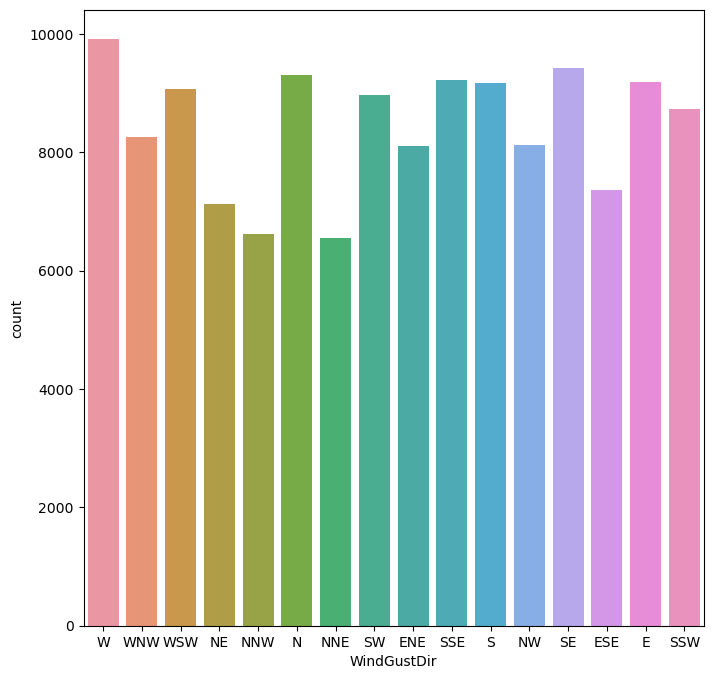

In [15]:
# Count plot for the artribute 'WindGustDir'
plt.figure(figsize=(8,8))
sns.countplot(rain_prediction['WindGustDir'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

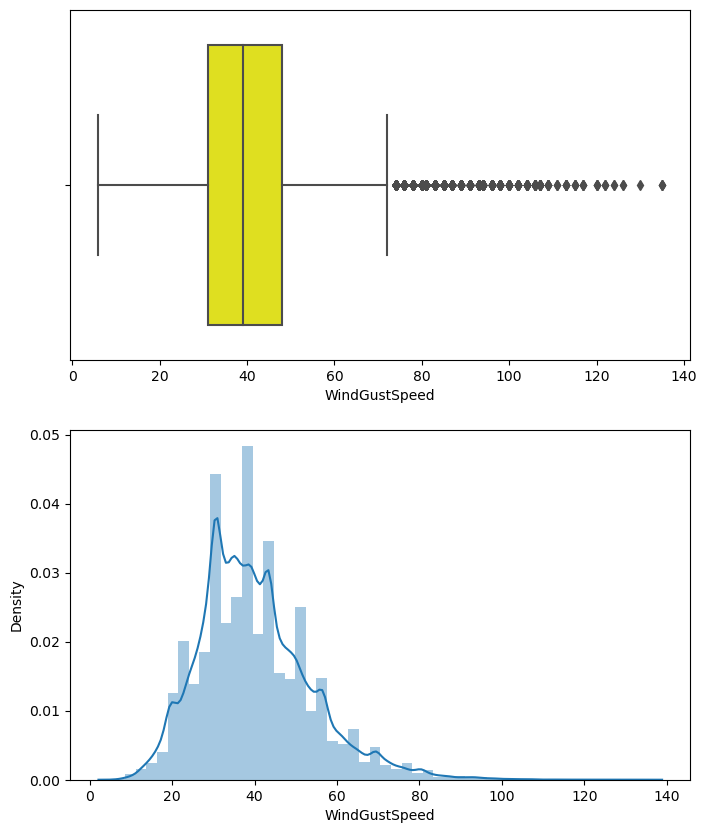

In [16]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,10))

sns.boxplot(rain_prediction['WindGustSpeed'], color='yellow', ax=ax[0])

sns.distplot(rain_prediction['WindGustSpeed'], ax=ax[1])

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

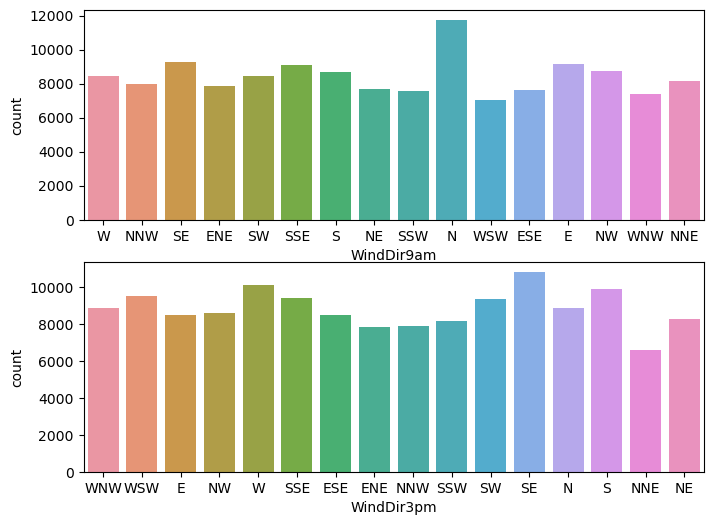

In [17]:
# Count plot for the artributes 'WindDir9am'and 'WindDir3pm'
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.countplot(rain_prediction['WindDir9am'],ax=ax[0])

sns.countplot(rain_prediction['WindDir3pm'],ax=ax[1])


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

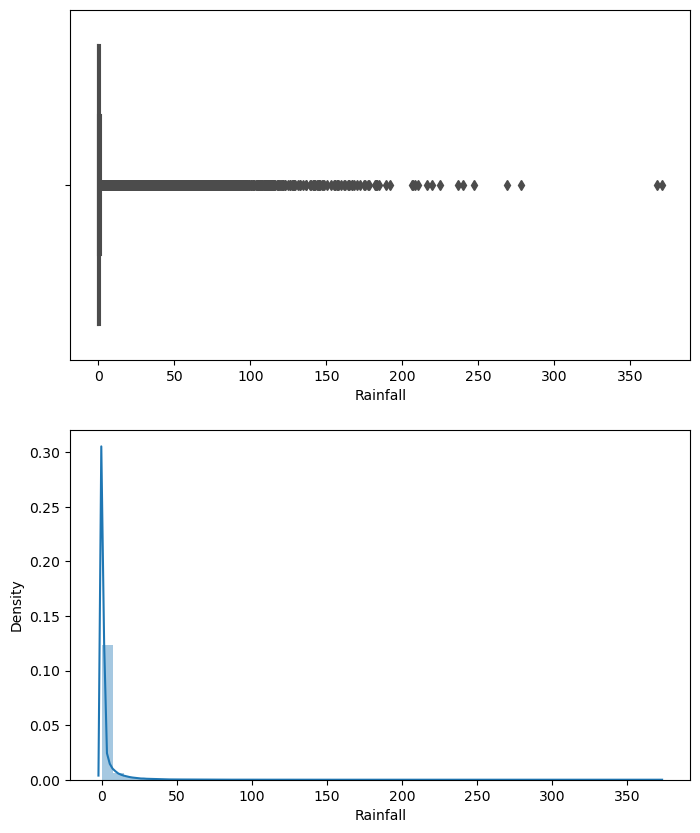

In [18]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,10))

sns.boxplot(rain_prediction['Rainfall'], color='yellow', ax=ax[0])

sns.distplot(rain_prediction['Rainfall'], ax=ax[1])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

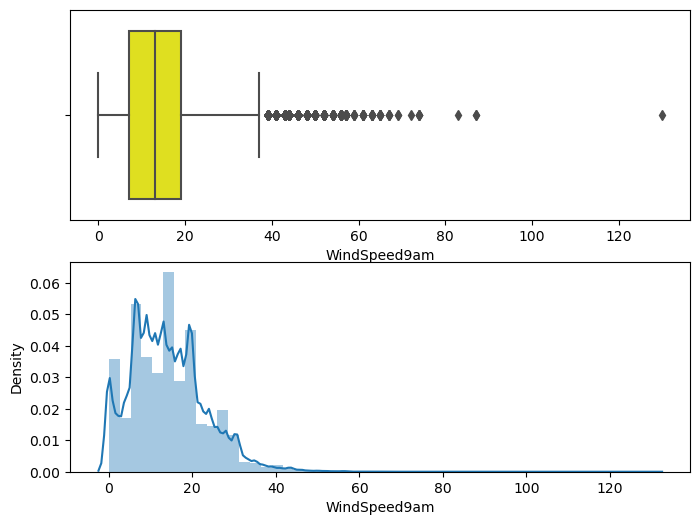

In [19]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['WindSpeed9am'], color='yellow', ax=ax[0])

sns.distplot(rain_prediction['WindSpeed9am'], ax=ax[1])


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

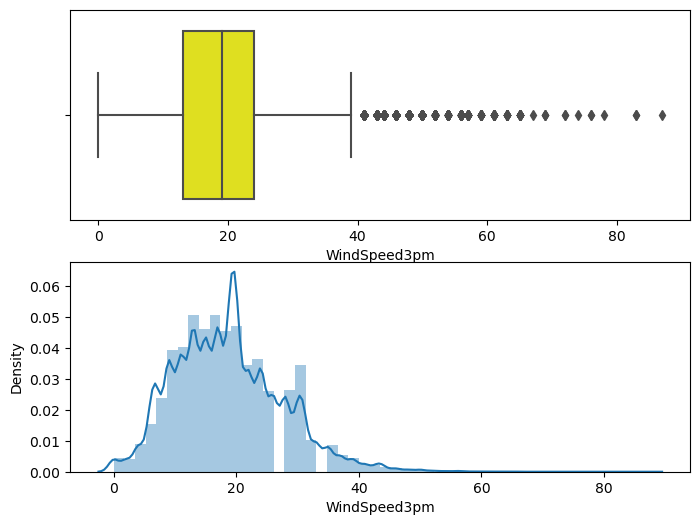

In [20]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['WindSpeed3pm'], color='yellow', ax=ax[0])

sns.distplot(rain_prediction['WindSpeed3pm'], ax=ax[1])


<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

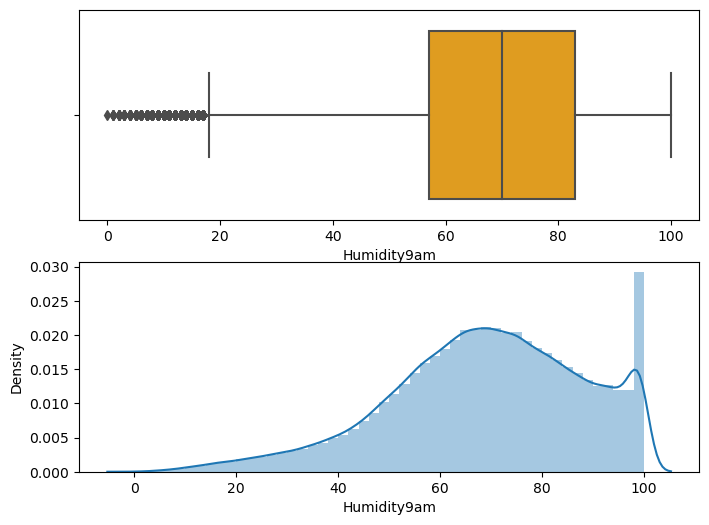

In [21]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Humidity9am'], color='orange', ax=ax[0])

sns.distplot(rain_prediction['Humidity9am'], ax=ax[1])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

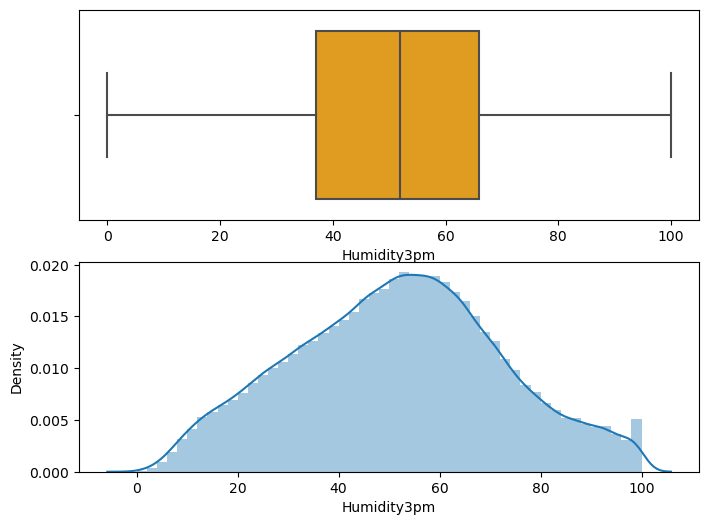

In [22]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Humidity3pm'], color='orange', ax=ax[0])

sns.distplot(rain_prediction['Humidity3pm'], ax=ax[1])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

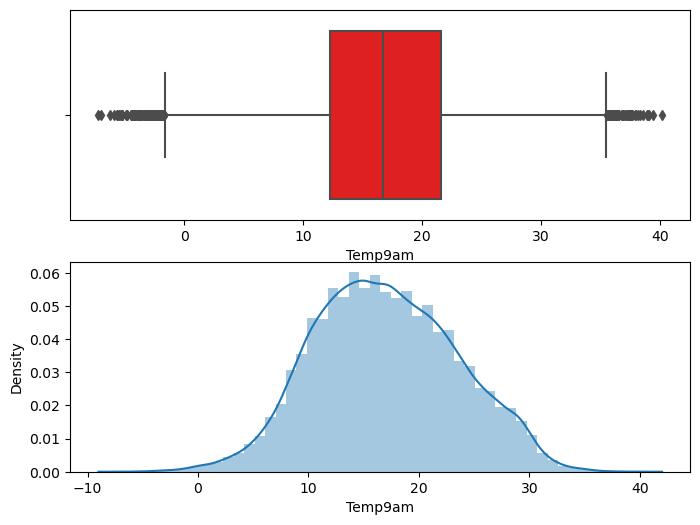

In [23]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Temp9am'], color='red', ax=ax[0])

sns.distplot(rain_prediction['Temp9am'], ax=ax[1])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

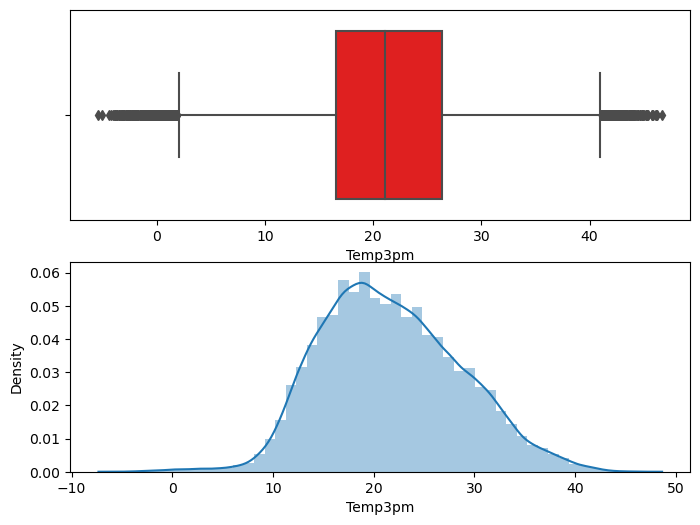

In [24]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Temp3pm'], color='red', ax=ax[0])

sns.distplot(rain_prediction['Temp3pm'], ax=ax[1])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

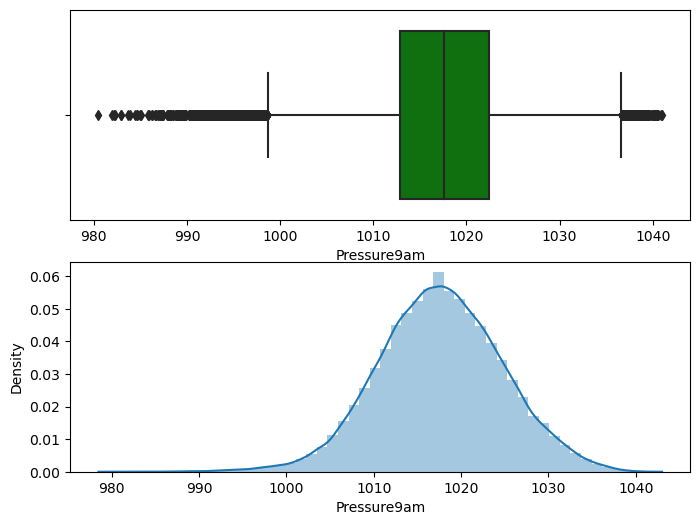

In [25]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Pressure9am'], color='green', ax=ax[0])

sns.distplot(rain_prediction['Pressure9am'], ax=ax[1])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

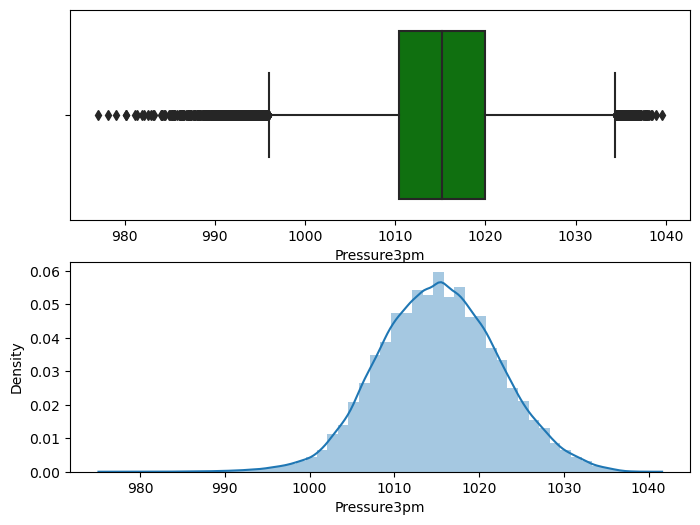

In [26]:
# Box plot and distribution plot for identifying outliers and skewness
fig, ax = plt.subplots(2, 1, figsize=(8,6))

sns.boxplot(rain_prediction['Pressure3pm'], color='green', ax=ax[0])

sns.distplot(rain_prediction['Pressure3pm'], ax=ax[1])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

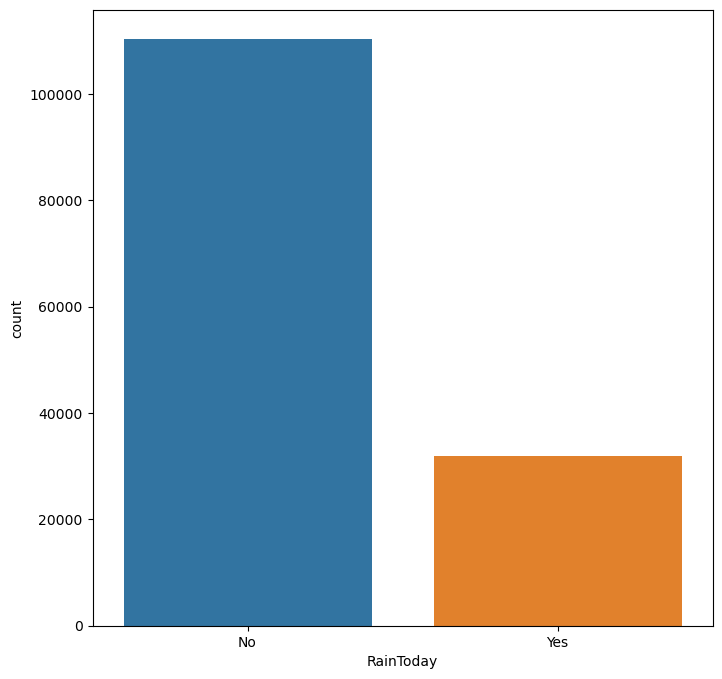

In [27]:
# count plot for the artribute' RainToday'
plt.figure(figsize=(8,8))
sns.countplot(rain_prediction['RainToday'])

In [28]:
# Counting the number of ' Yes' and ' No' for future processing
rain_prediction.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

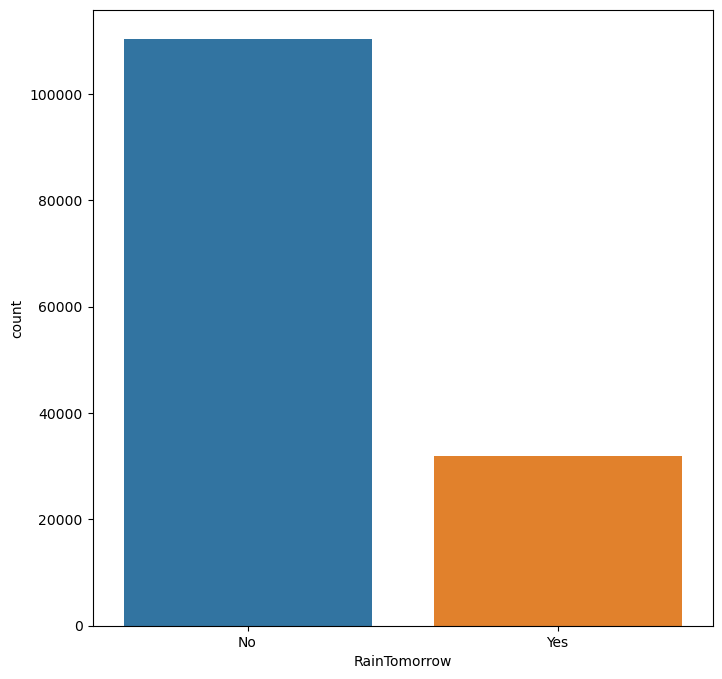

In [29]:
# count plot for the artribute' RainTomorrow'
plt.figure(figsize=(8,8))
sns.countplot(rain_prediction['RainTomorrow'])

In [30]:
# Counting the number of ' Yes' and ' No' for future processing
rain_prediction.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

## 1.2  HANDLING NULL VALUES

In [31]:
# identifying null value count for each columns
rain_prediction.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Filling null values using mode and median imputation

In [32]:
# Filling null values using median and mode
rain_prediction['WindGustDir'] = rain_prediction['WindGustDir'].fillna(rain_prediction['WindGustDir'].mode()[0])
rain_prediction['WindDir9am'] = rain_prediction['WindDir9am'].fillna(rain_prediction['WindDir9am'].mode()[0])
rain_prediction['WindDir3pm'] = rain_prediction['WindDir3pm'].fillna(rain_prediction['WindDir3pm'].mode()[0])
rain_prediction['RainToday'] = rain_prediction['RainToday'].fillna(rain_prediction['RainToday'].mode()[0])
rain_prediction['RainTomorrow'] = rain_prediction['RainTomorrow'].fillna(rain_prediction['RainTomorrow'].mode()[0])
rain_prediction['MinTemp'] = rain_prediction['MinTemp'].fillna(rain_prediction['MinTemp'].median())
rain_prediction['MaxTemp'] = rain_prediction['MaxTemp'].fillna(rain_prediction['MaxTemp'].median())
rain_prediction['Rainfall'] = rain_prediction['Rainfall'].fillna(rain_prediction['Rainfall'].median())
rain_prediction['WindGustSpeed'] = rain_prediction['WindGustSpeed'].fillna(rain_prediction['WindGustSpeed'].median())
rain_prediction['WindSpeed9am'] = rain_prediction['WindSpeed9am'].fillna(rain_prediction['WindSpeed9am'].median())
rain_prediction['WindSpeed3pm'] = rain_prediction['WindSpeed3pm'].fillna(rain_prediction['WindSpeed3pm'].median())
rain_prediction['Humidity9am'] = rain_prediction['Humidity9am'].fillna(rain_prediction['Humidity9am'].median())
rain_prediction['Humidity3pm'] = rain_prediction['Humidity3pm'].fillna(rain_prediction['Humidity3pm'].median())
rain_prediction['Pressure9am'] = rain_prediction['Pressure9am'].fillna(rain_prediction['Pressure9am'].median())
rain_prediction['Pressure3pm'] = rain_prediction['Pressure3pm'].fillna(rain_prediction['Pressure3pm'].median())
rain_prediction['Temp9am'] = rain_prediction['Temp9am'].fillna(rain_prediction['Temp9am'].median())
rain_prediction['Temp3pm'] = rain_prediction['Temp3pm'].fillna(rain_prediction['Temp3pm'].median())

In [33]:
# identifying null value count for each columns to check it was removed
rain_prediction.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## 1.3 HANDLING/ REMOVING OUTLIERS

In [34]:
# Remove Outliers from Numerical Features 
# Defining a variable 'features_outliers'which contains all columns with outliers
features_outliers='MinTemp','MaxTemp', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm', 'Humidity9am','Temp9am','Temp3pm','Rainfall','Pressure9am','Pressure3pm'
for feature in features_outliers:
  q1 = rain_prediction[feature].quantile(0.25)
  q3 = rain_prediction[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  rain_prediction.loc[rain_prediction[feature]<lower_limit, feature] = lower_limit
  rain_prediction.loc[rain_prediction[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data

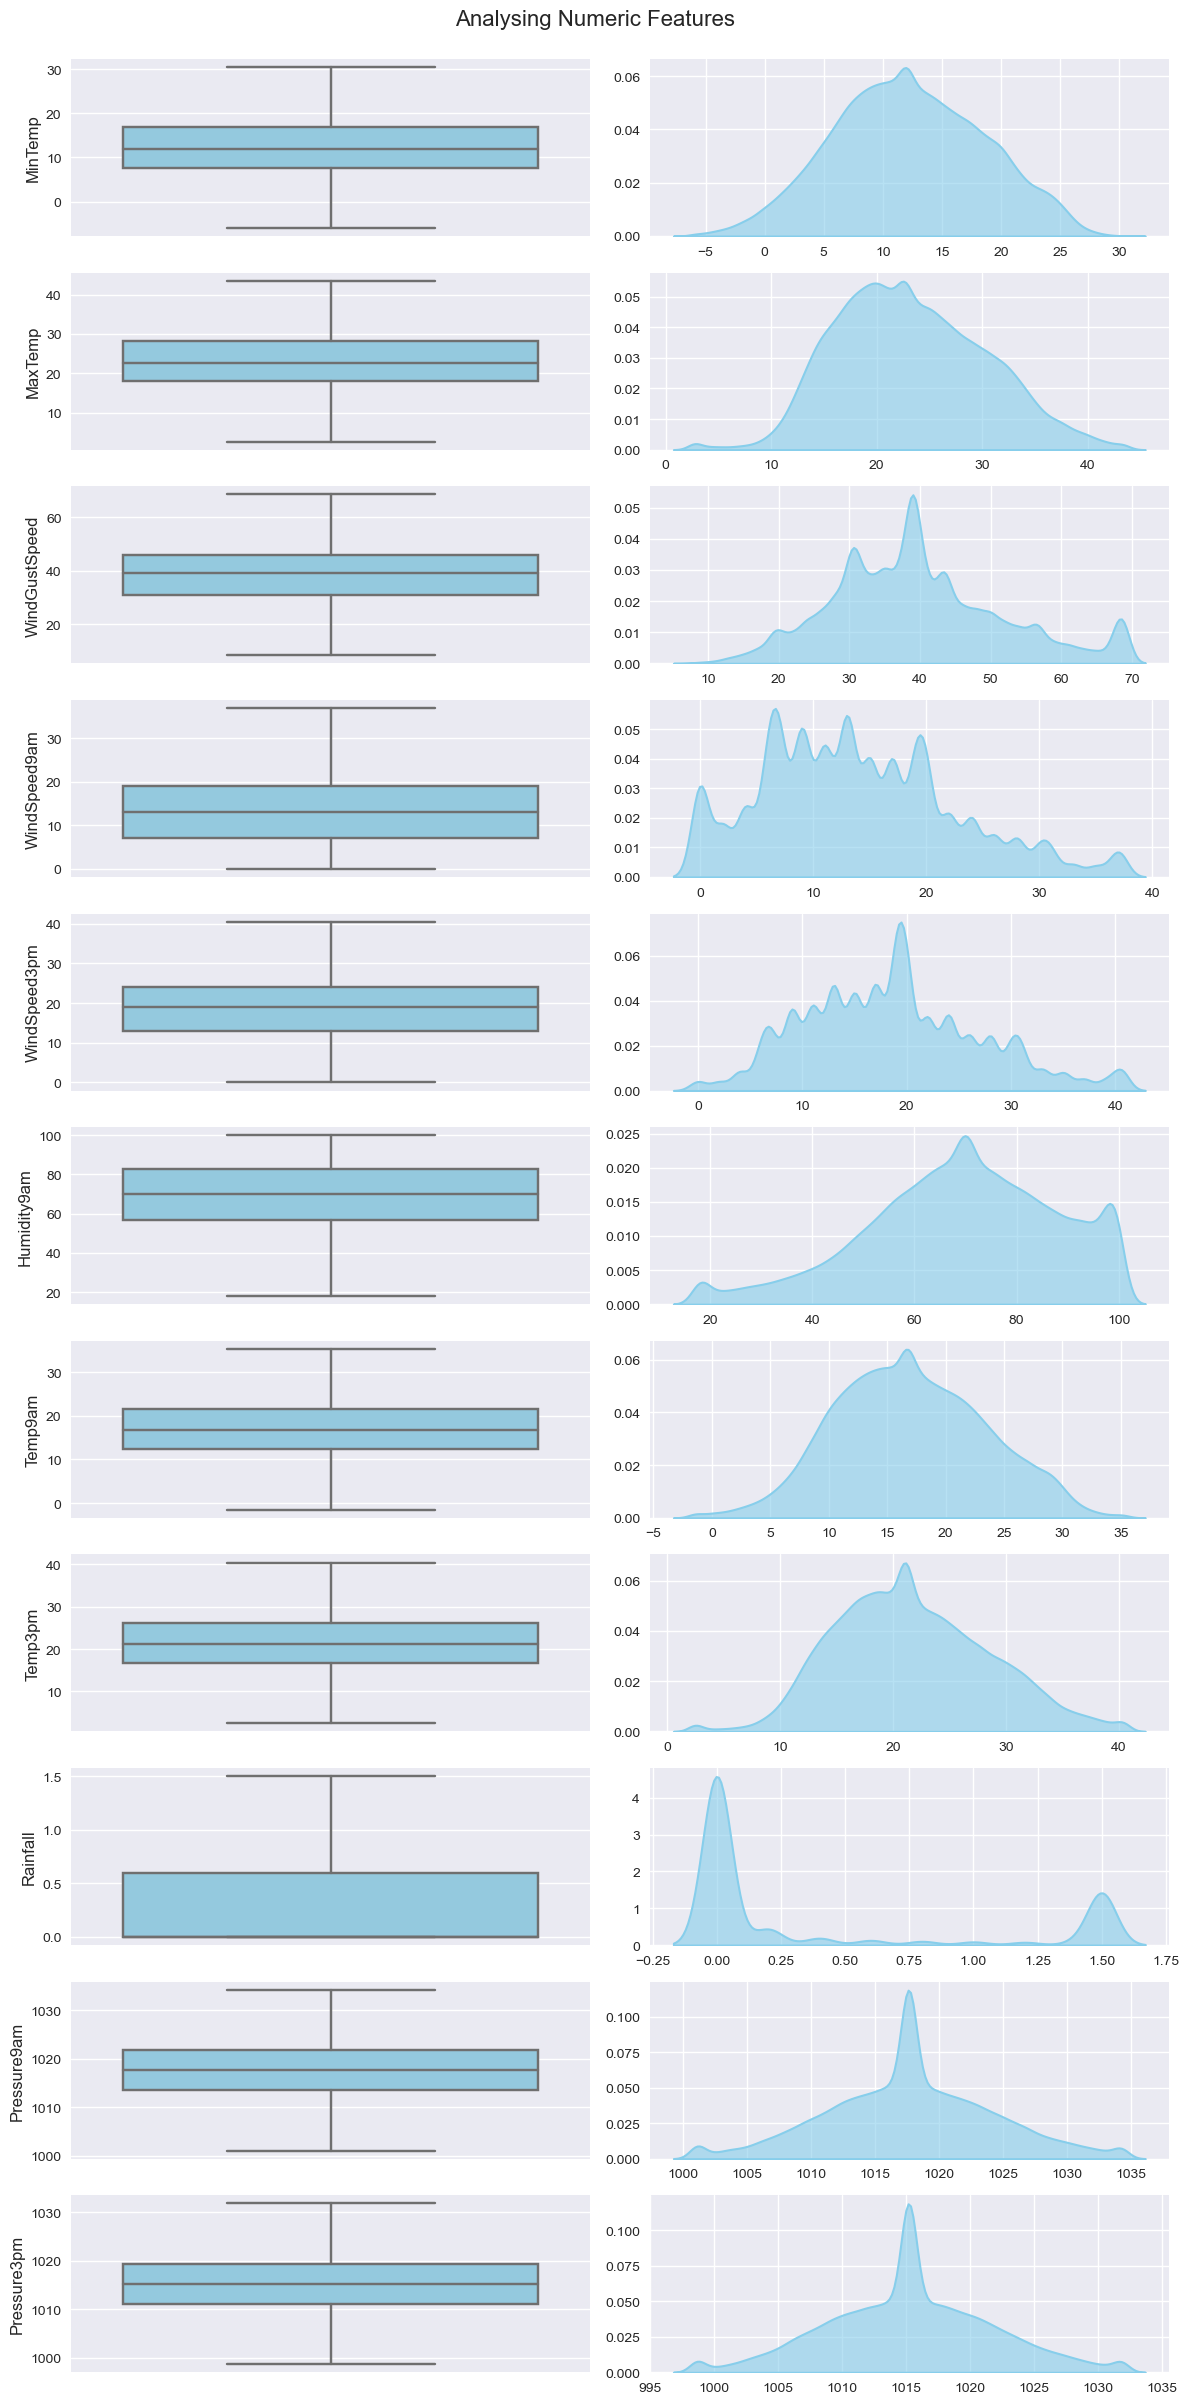

In [35]:
# Detecting outliers are removed from the variable 'features_outliers' using visuals
plt.style.use('seaborn')
fig, axis = plt.subplots(11, 2, figsize = (12, 24))
for i, num_var in enumerate(features_outliers):
    
    # Visualising features using box plot
    sns.boxplot(y = num_var, data = rain_prediction , ax = axis[i][0], color = 'skyblue')
    
    # Visualising features using kdeplot
    sns.kdeplot(x = num_var, data = rain_prediction, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

## 1.4 Multivariate analysis

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

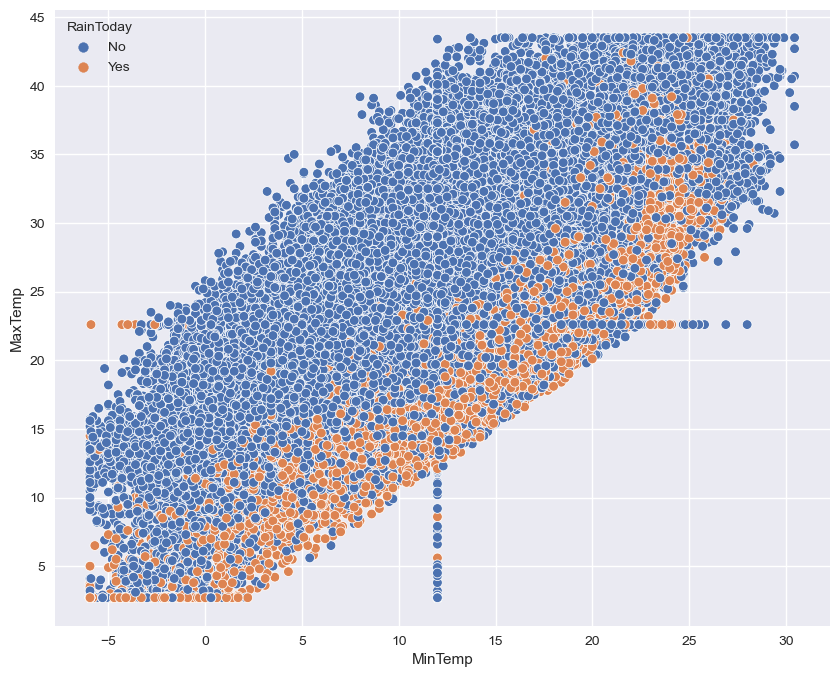

In [36]:
# Scatter plot is used to observe each pair of columns
plt.figure(figsize=(10,8))
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='RainToday', palette="deep", data= rain_prediction)

<AxesSubplot:xlabel='Temp3pm', ylabel='Humidity3pm'>

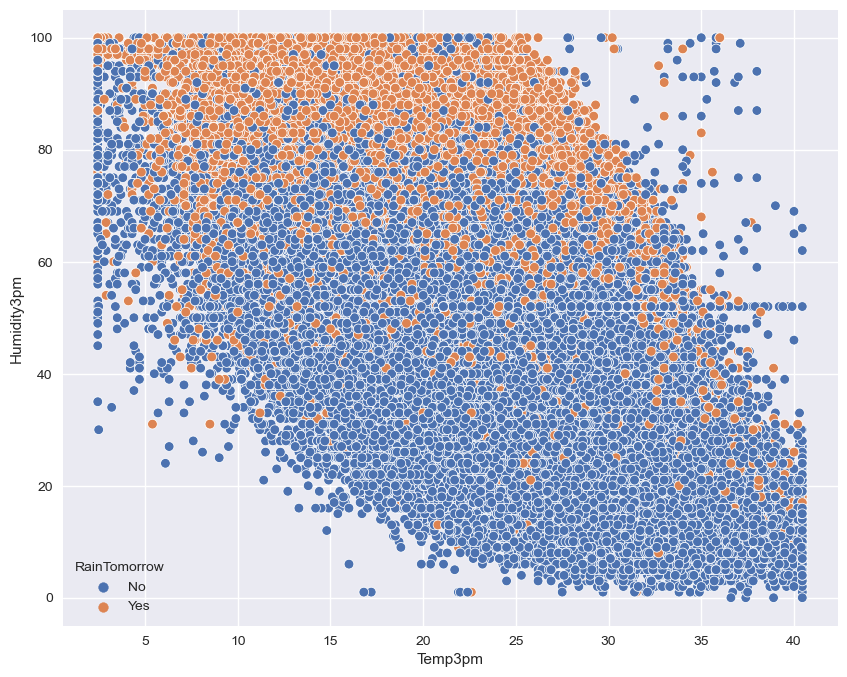

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Temp3pm', y='Humidity3pm', hue='RainTomorrow',palette="deep", data= rain_prediction)

<AxesSubplot:xlabel='Temp9am', ylabel='Humidity9am'>

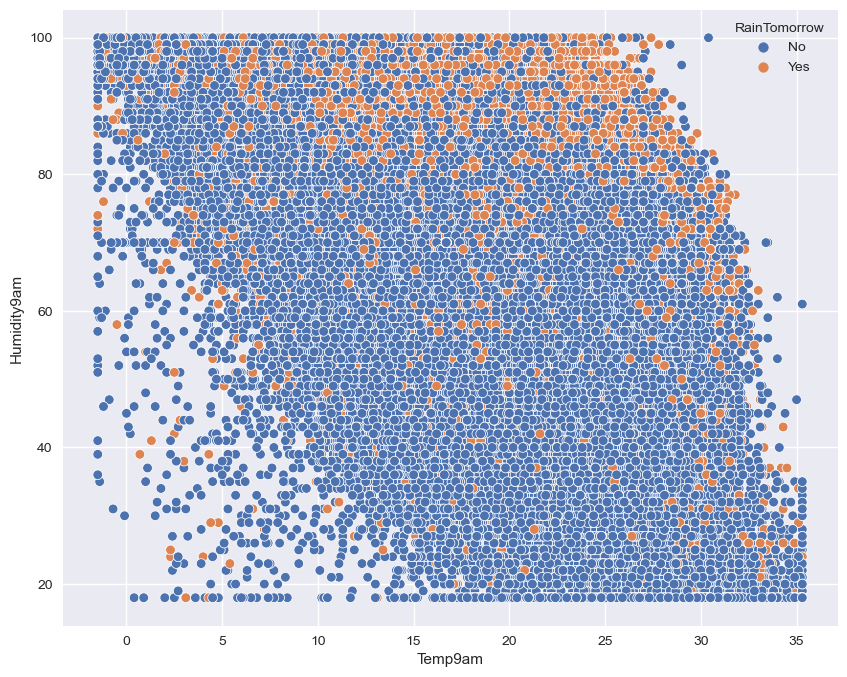

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Temp9am', y='Humidity9am', hue='RainTomorrow', palette="deep", data= rain_prediction)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

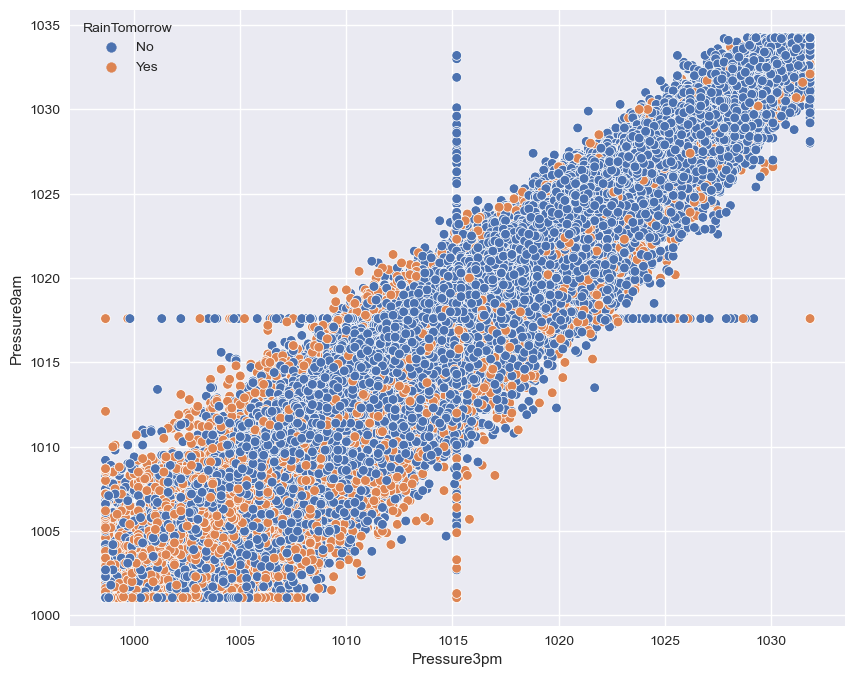

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Pressure3pm', y='Pressure9am', hue='RainTomorrow',palette="deep", data= rain_prediction)

(0.0, 2.0)

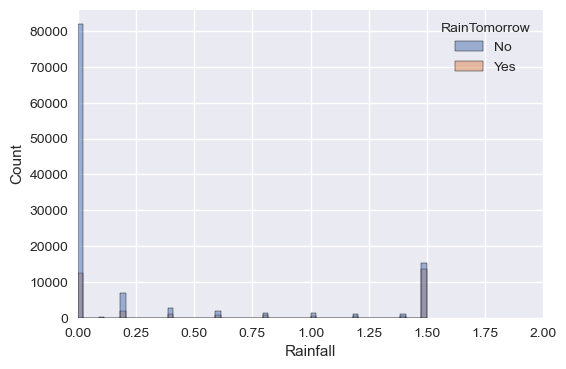

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(x='Rainfall', hue='RainTomorrow',palette="deep", data= rain_prediction)
plt.xlim(0,2)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

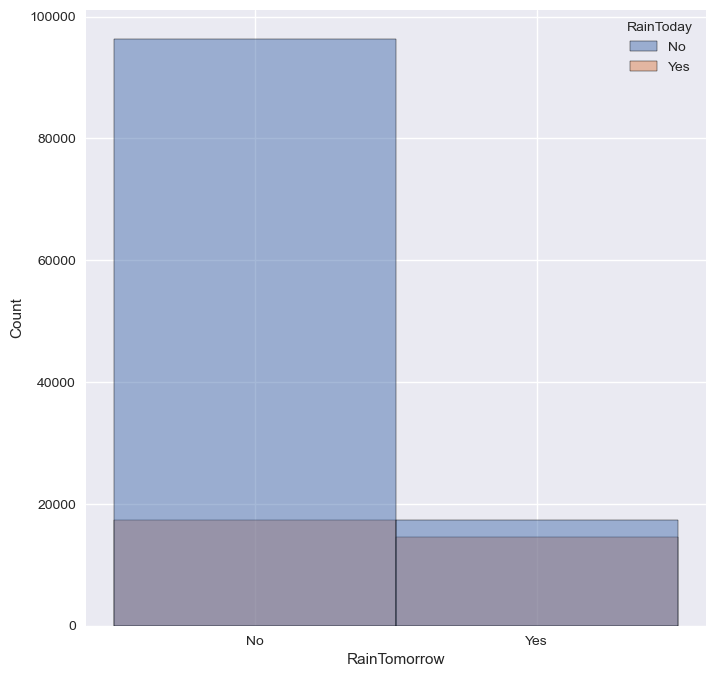

In [41]:
plt.figure(figsize=(8,8))
sns.histplot(x='RainTomorrow', hue='RainToday',palette="deep", data= rain_prediction)

## 1.5 ENCODING CATEGORICAL VARIABLE

In [42]:
# Converting categorical data to numeric data
le=LabelEncoder()
rain_prediction['WindGustDir']=le.fit_transform(rain_prediction['WindGustDir'])
rain_prediction['WindDir9am']=le.fit_transform(rain_prediction['WindDir9am'])
rain_prediction['WindDir3pm']=le.fit_transform(rain_prediction['WindDir3pm'])
rain_prediction['RainToday']=le.fit_transform(rain_prediction['RainToday'])
rain_prediction['RainTomorrow']=le.fit_transform(rain_prediction['RainTomorrow'])

## 1.6 DELETING UNWANTED COLUMNS

In [43]:
# Deleting some unimportant columns
rain_prediction=rain_prediction.drop(['Date','Location'], axis=1)

In [44]:
# Reading first 5 rows after removing the artributes ' Date' and 'Location'
rain_prediction.head()

MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0     13.4     22.9       0.6           13           44.0          13   
1      7.4     25.1       0.0           14           44.0           6   
2     12.9     25.7       0.0           15           46.0          13   
3      9.2     28.0       0.0            4           24.0           9   
4     17.5     32.3       1.0           13           41.0           1   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          14          20.0          24.0         71.0         22.0   
1          15           4.0          22.0         44.0         25.0   
2          15          19.0          26.0         38.0         30.0   
3           0          11.0           9.0         45.0         16.0   
4           7           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8          0             0  
1       1010.6       1007.8     17.2     24.3          0             0  
2       1007.6       1008.7     21.0     23.2          0             0  
3       1017.6       1012.8     18.1     26.5          0             0  
4       1010.8       1006.0     17.8     29.7          0             0

## 2.  Feature Selection

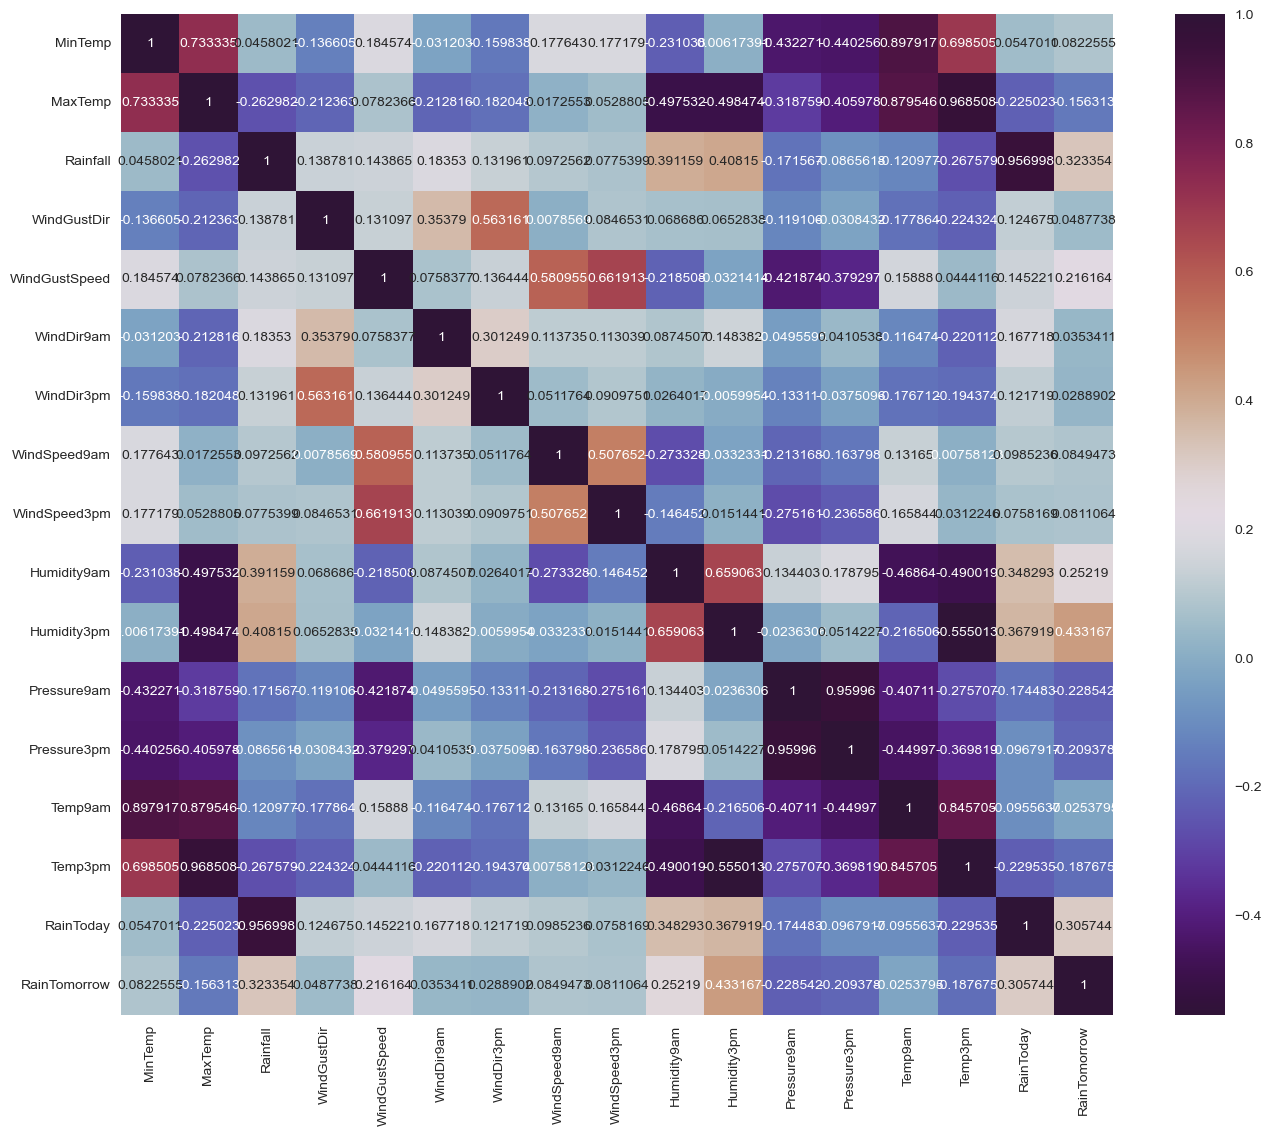

In [45]:
# correlation matrix is used to identify how columns are correlated
plt.figure(figsize=(16,13))
sns.heatmap(rain_prediction.corr(), annot= True, fmt="1g", cmap='twilight_shifted', cbar=True);

In [46]:
# Dropping columns that less correlated with the target variable
rain_prediction=rain_prediction.drop(['Temp3pm','MaxTemp','MinTemp', 'Temp9am'], axis=1)

In [47]:
#Checking which columns are mostly correlated with the target
rain_prediction.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.433167
Rainfall         0.323354
RainToday        0.305744
Humidity9am      0.252190
Pressure9am      0.228542
WindGustSpeed    0.216164
Pressure3pm      0.209378
WindSpeed9am     0.084947
WindSpeed3pm     0.081106
WindGustDir      0.048774
WindDir9am       0.035341
WindDir3pm       0.028890
Name: RainTomorrow, dtype: float64

In [48]:
# Dropping columns that less correlated with the target variable
rain_prediction=rain_prediction.drop(['WindSpeed3pm','WindSpeed9am','WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

## 2.1  Visualising features that are mostly correlated with the target variable

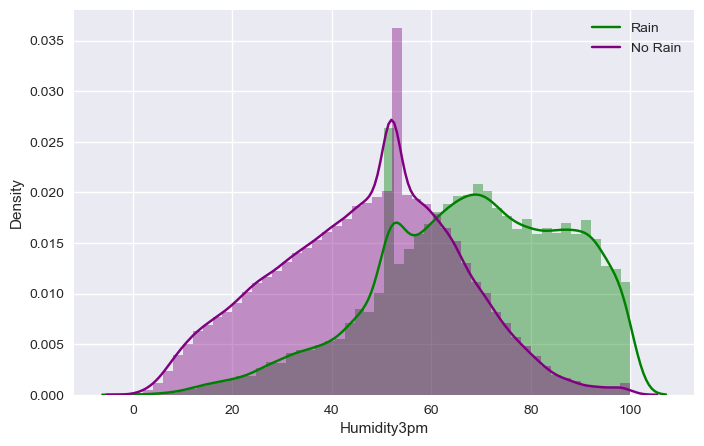

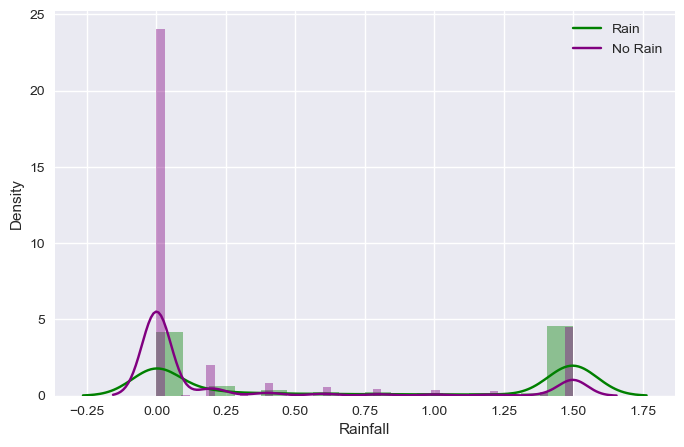

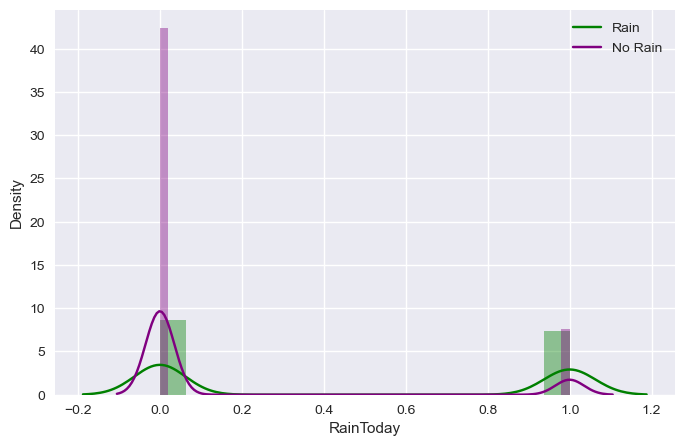

In [49]:
features_selected1 = ['Humidity3pm','Rainfall','RainToday']
for col in features_selected1:
    plt.figure(figsize = (8, 5))
    sns.distplot(rain_prediction.loc[rain_prediction.RainTomorrow==1][col],kde_kws={'label':'Will Rain'},color='green')
    sns.distplot(rain_prediction.loc[rain_prediction.RainTomorrow==0][col],kde_kws={'label':'No Rain'},color='purple')
    plt.legend(['Rain','No Rain'])

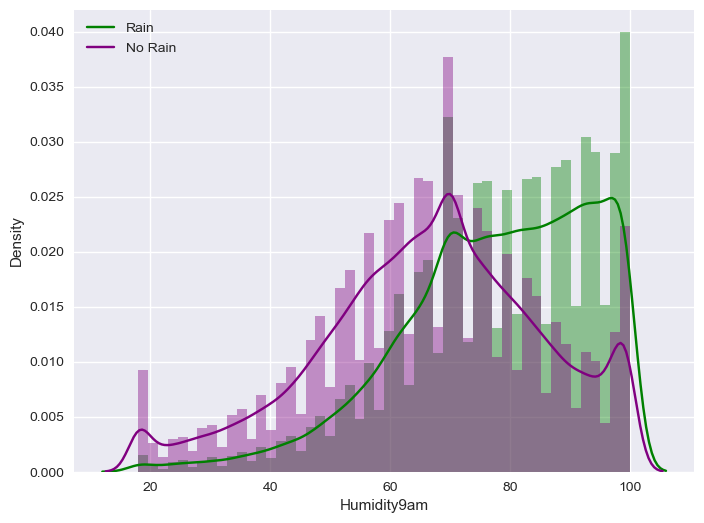

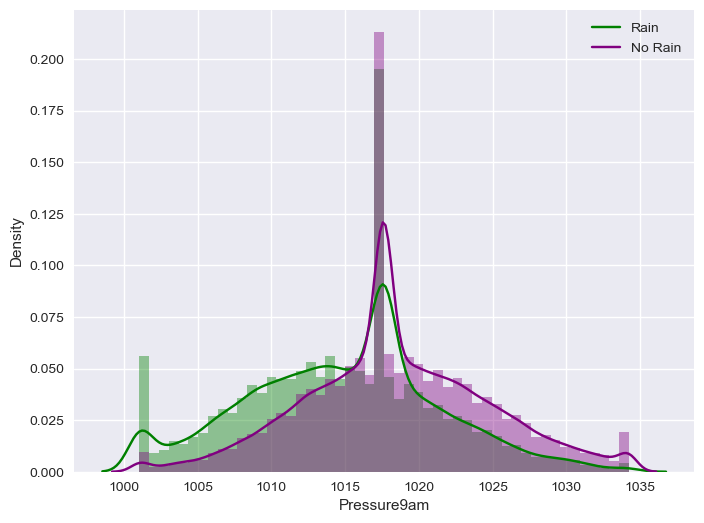

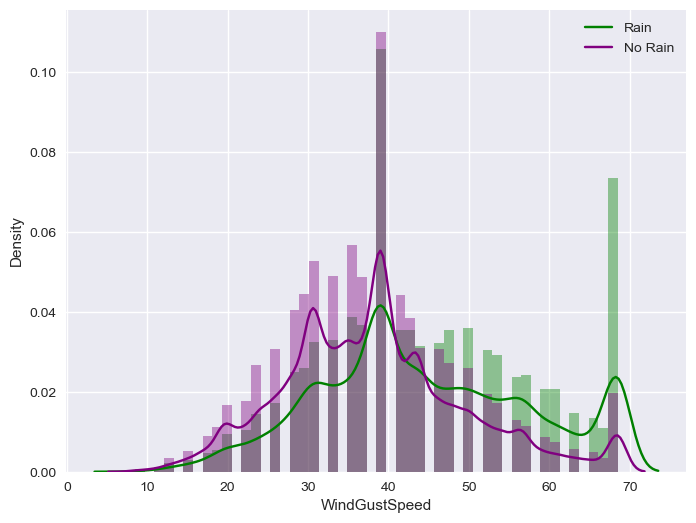

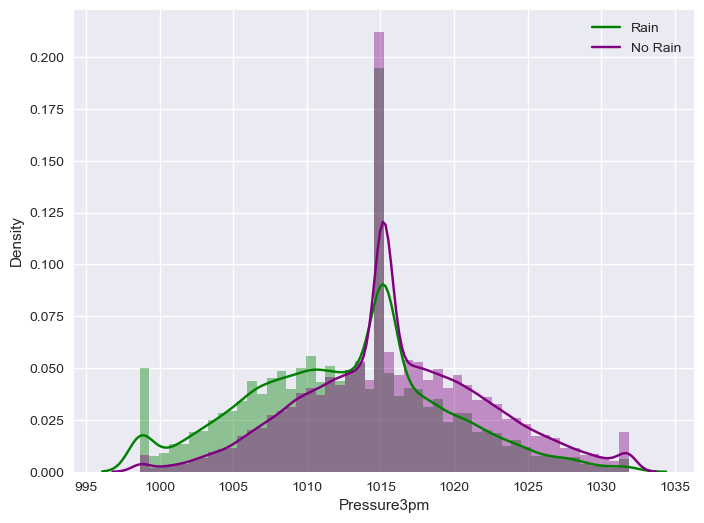

In [50]:
features_selected2 =['Humidity9am','Pressure9am','WindGustSpeed','Pressure3pm']
for col in features_selected2:
    plt.figure(figsize = (8, 6))
    sns.distplot(rain_prediction.loc[rain_prediction.RainTomorrow==1][col],kde_kws={'label':'Will Rain'},color='green')
    sns.distplot(rain_prediction.loc[rain_prediction.RainTomorrow==0][col],kde_kws={'label':'No Rain'},color='purple')
    plt.legend(['Rain','No Rain'])

## FINDINGS

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

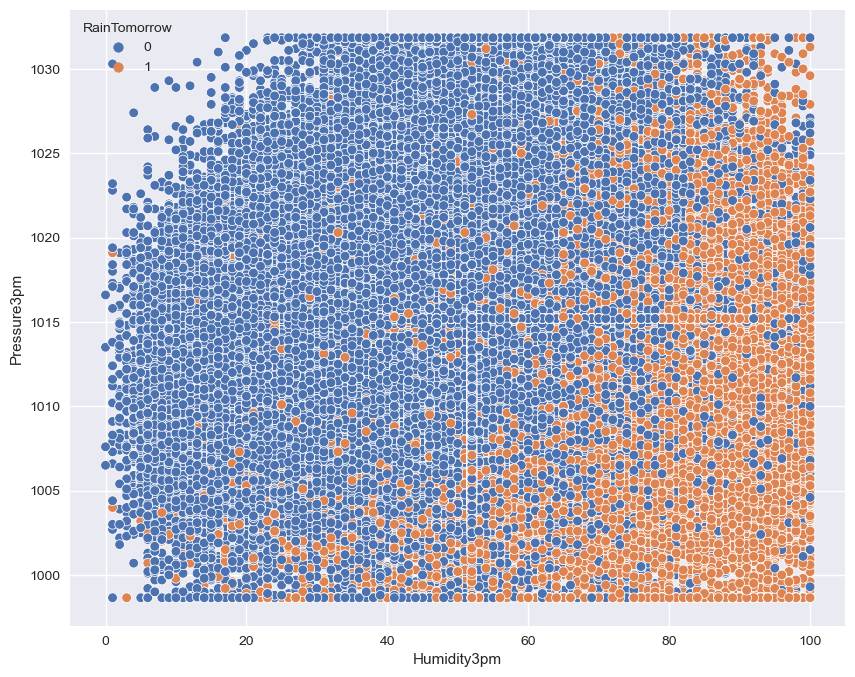

In [51]:
# Scatter plot is used to observe each pair of columns
plt.figure(figsize=(10,8))
sns.scatterplot(x='Humidity3pm', y='Pressure3pm', hue='RainTomorrow', palette="deep", data= rain_prediction)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure9am'>

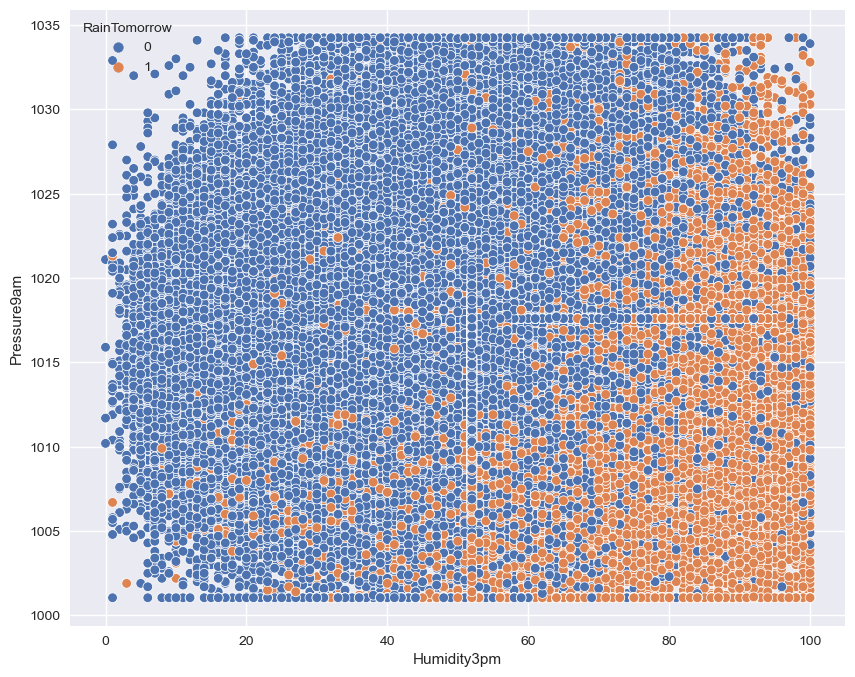

In [52]:
# Scatter plot is used to observe each pair of columns
plt.figure(figsize=(10,8))
sns.scatterplot(x='Humidity3pm', y='Pressure9am', hue='RainTomorrow', palette="deep", data= rain_prediction)

## Assigning independent feature as x and target variable as y

In [53]:
#Defining feature and target variable
feature=pd.DataFrame(rain_prediction.drop(['RainTomorrow'], axis=1))
target=pd.DataFrame(rain_prediction['RainTomorrow'])

In [54]:
# Listing columns in the feature variable
feature.columns

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'RainToday'],
      dtype='object')

In [55]:
# Reading rows and columns in the feature variable
feature.shape

(145460, 7)

In [56]:
# Reading rows and columns in the target variable
target.shape

(145460, 1)

## SAMPLING USING SMOTE

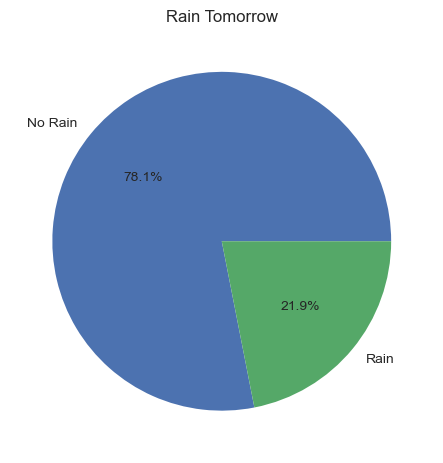

In [57]:
# Count the number of occurrences of 0 and 1 in the RainTomorrow column
counts = rain_prediction['RainTomorrow'].value_counts()
# Create a pie chart
plt.pie(counts, labels=['No Rain', 'Rain'], autopct='%1.1f%%')
plt.title('Rain Tomorrow')
plt.show()

In [58]:
# Balancing dataset using sampling technique
smote=SMOTE()
x,y=smote.fit_resample(feature,target)

print(x.shape,y.shape)

(227166, 7) (227166, 1)


## SCALING DATA

In [59]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0  0.400000       0.591667     0.646341         0.22     0.200301   
1  0.000000       0.591667     0.317073         0.25     0.287651   
2  0.000000       0.625000     0.243902         0.30     0.197289   
3  0.000000       0.258333     0.329268         0.16     0.498494   
4  0.666667       0.541667     0.780488         0.33     0.293675   

   Pressure3pm  RainToday  
0     0.254518        0.0  
1     0.275602        0.0  
2     0.302711        0.0  
3     0.426205        0.0  
4     0.221386        0.0

## Split into testing and training data

In [60]:
# Importing library for training and testing the data
# Splitting dataset with 80% of training data and 20% of the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [61]:
# Listing number of rows and columns in the training and testing data
print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (181732, 7)
y_train shape is:  (181732, 1)
x_test shape is:  (45434, 7)
y_test shape is:  (45434, 1)


## MACHINE LEARNING MODELS

## 1.1 RANDOM FOREST (n_estimator=100, max_depth=4)

In [62]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
rf1.fit(x_train,y_train)
y_pred = rf1.predict(x_test)
print(classification_report(y_test, y_pred))
print("Random Forest model accuracy(rf1)(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Random Forest(rf1) is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     22669
           1       0.79      0.76      0.77     22765

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434

Random Forest model accuracy(rf1)(in %): 77.77435400801163 %
F1 score for Random Forest(rf1) is : 77.35366674142186 %


## 1.2 RANDOM FOREST (n_estimator=150, max_depth=4)

In [63]:
rf2 = RandomForestClassifier(n_estimators=150, max_depth=4,random_state=0)
rf2.fit(x_train,y_train)
y_pred = rf2.predict(x_test)
print(classification_report(y_test, y_pred))
print("Random Forest model (rf2)accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Random Forest(rf2) is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     22669
           1       0.79      0.76      0.77     22765

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434

Random Forest model (rf2)accuracy(in %): 77.84038385350178 %
F1 score for Random Forest(rf2) is : 77.45633676668159 %


## 1.3 RANDOM FOREST (n_estimator=100, max_depth=5)

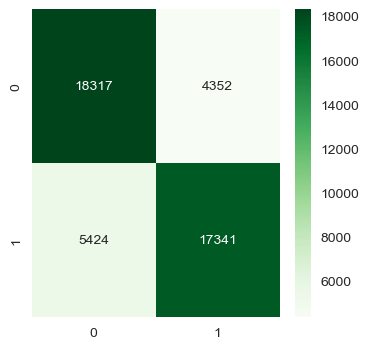

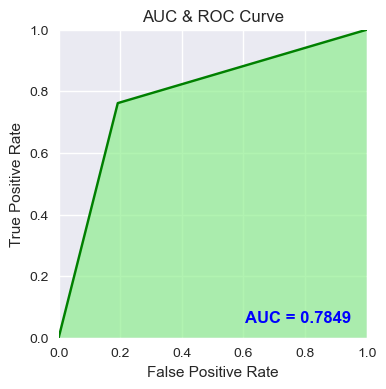

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     22669
           1       0.80      0.76      0.78     22765

    accuracy                           0.78     45434
   macro avg       0.79      0.78      0.78     45434
weighted avg       0.79      0.78      0.78     45434

Random Forest model(rf3) accuracy(in %): 78.48307434960601 %
F1 score for Random Forest(rf3) is : 78.01070673444599 %


In [64]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
rf3.fit(x_train,y_train)
y_pred = rf3.predict(x_test)

plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="g", cmap="Greens")

auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(classification_report(y_test, y_pred))
print("Random Forest model(rf3) accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Random Forest(rf3) is :",f1_score(y_test, y_pred)*100, "%")

## Cross Validation using Random Forest

In [65]:
# Cross validation with 5 experiments for random forest classifier
print("Cross Validation score of Random Forest is :",cross_val_score(rf3, x, y, cv=5, scoring='accuracy').mean()*100, "%")

Cross Validation score of Random Forest is : 77.80083299387945 %


## RESULTS FROM RANDOM FOREST CLASSIFIER:

## 2.1 K-NEAREST NEIGHBOURS(n_neighbors=2)

In [66]:
knn1 = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
knn1.fit(x_train,y_train)
y_pred = knn1.predict(x_test)
print(classification_report(y_test, y_pred))
print("k- nearest neighbour(knn1) model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for k- nearest neighbours(knn1) is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     22669
           1       0.86      0.80      0.83     22765

    accuracy                           0.84     45434
   macro avg       0.84      0.84      0.84     45434
weighted avg       0.84      0.84      0.84     45434

k- nearest neighbour(knn1) model accuracy(in %): 83.651010256636 %
F1 score for k- nearest neighbours(knn1) is : 83.0673839700921 %


## 2.2 K-NEAREST NEIGHBOURS(n_neighbors=3)

In [67]:
knn2 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )
knn2.fit(x_train,y_train)
y_pred = knn2.predict(x_test)
print(classification_report(y_test, y_pred))
print("k- nearest neighbour (knn2) model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for KNN (knn2)is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.88      0.78      0.83     22669
           1       0.80      0.89      0.84     22765

    accuracy                           0.84     45434
   macro avg       0.84      0.84      0.84     45434
weighted avg       0.84      0.84      0.84     45434

k- nearest neighbour (knn2) model accuracy(in %): 83.57397543689747 %
F1 score for KNN (knn2)is : 84.46341209534714 %


## 2.3 K-NEAREST NEIGHBOURS(n_neighbors=4)

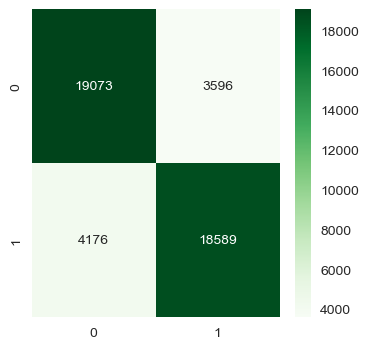

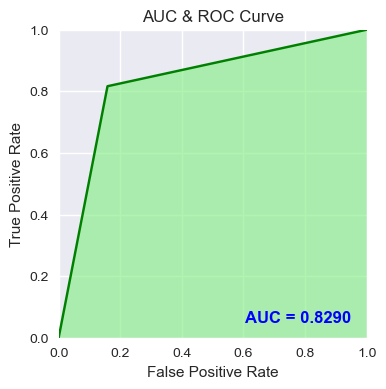

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     22669
           1       0.84      0.82      0.83     22765

    accuracy                           0.83     45434
   macro avg       0.83      0.83      0.83     45434
weighted avg       0.83      0.83      0.83     45434

K- nearest neighbour(knn3) model accuracy(in %): 82.89386802834882 %
F1 score for k- nearest neighbours(knn3) is : 82.70967741935483 %


In [68]:
knn3 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
knn3.fit(x_train,y_train)
y_pred = knn3.predict(x_test)

plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="g", cmap="Greens")

auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(classification_report(y_test, y_pred))
print("K- nearest neighbour(knn3) model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for k- nearest neighbours(knn3) is :",f1_score(y_test, y_pred)*100, "%")

## Cross Validation using k- Nearest Neighbours

In [69]:
# Cross validation with 5 experiments for k-Nearest Neighbors
print("Cross Validation score of K- Nearest Neighbours is :",cross_val_score(knn3, x, y, cv=5, scoring='accuracy').mean()*100, "%")

Cross Validation score of K- Nearest Neighbours is : 81.94846270060651 %


## RESULT FROM K- NEAREST NEIGHBOURS:

## 3. Gaussian Naive Bayes

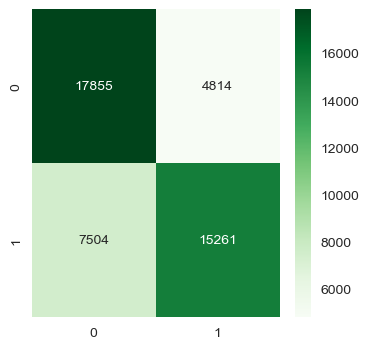

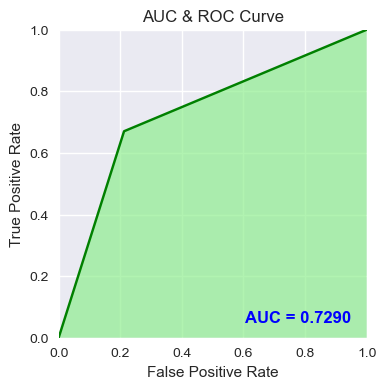

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     22669
           1       0.76      0.67      0.71     22765

    accuracy                           0.73     45434
   macro avg       0.73      0.73      0.73     45434
weighted avg       0.73      0.73      0.73     45434

Gaussian Naive Bayes model accuracy(in %): 72.88814544173967 %
F1 score for Gaussian NB is : 71.24649859943978 %


In [70]:
gnb = GaussianNB(priors=None, var_smoothing=1e-9)
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="g", cmap="Greens")

auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(classification_report(y_test, y_pred))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Gaussian NB is :",f1_score(y_test, y_pred)*100, "%")

## Cross Validation using Gaussian Naive Bayes

In [71]:
# Cross validation with 5 experiments for gaussian naive bayes
print("Cross Validation score of Guassian NB is :",cross_val_score(gnb, x, y, cv=5, scoring='accuracy').mean()*100, "%")

Cross Validation score of Guassian NB is : 72.95369706874196 %


## RESULTS FROM GAUSSIAN NAIVE BAYES:

## 4.1 Xg Boost Classifier (learning rate=1.0)

In [72]:
xgb1 = XGBClassifier(booster = 'gbtree', learning_rate = 1.0, max_depth = 5, n_estimators = 200)
xgb1.fit(x_train, y_train);
y_pred = xgb1.predict(x_test)
print(classification_report(y_test, y_pred))
print("XgBoost (xgb1) model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for XgBoost Classifier (xgb1)is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22669
           1       0.92      0.85      0.89     22765

    accuracy                           0.89     45434
   macro avg       0.89      0.89      0.89     45434
weighted avg       0.89      0.89      0.89     45434

XgBoost (xgb1) model accuracy(in %): 88.94220187524762 %
F1 score for XgBoost Classifier (xgb1)is : 88.53910028287252 %


## 4.2 XGBoost Classifier (learning rate=0.25)

In [73]:
xgb2 = XGBClassifier(booster = 'gbtree', learning_rate = 0.25, max_depth = 5, n_estimators = 200)
xgb2.fit(x_train, y_train);
y_pred = xgb2.predict(x_test)
print(classification_report(y_test, y_pred))
print("XgBoost model(xgb2) accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for XgBoost Classifier (xgb2)is :",f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22669
           1       0.92      0.85      0.88     22765

    accuracy                           0.89     45434
   macro avg       0.89      0.89      0.89     45434
weighted avg       0.89      0.89      0.89     45434

XgBoost model(xgb2) accuracy(in %): 88.76392129242417 %
F1 score for XgBoost Classifier (xgb2)is : 88.32902768569535 %


## 4.3 XGBoost Classifier (learning rate=0.1)

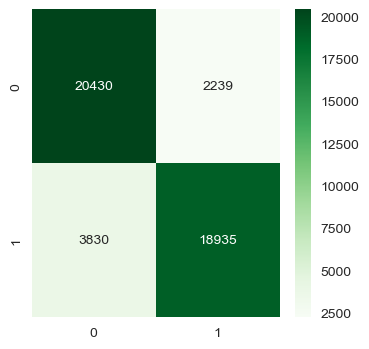

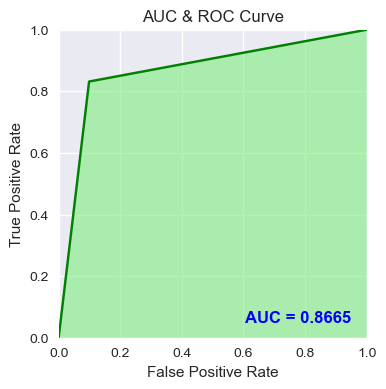

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     22669
           1       0.89      0.83      0.86     22765

    accuracy                           0.87     45434
   macro avg       0.87      0.87      0.87     45434
weighted avg       0.87      0.87      0.87     45434

XgBoost model(xgb3) accuracy(in %): 86.64216225734032 %
F1 score for XgBoost Classifier(xgb3) is : 86.18766926875895 %


In [74]:
xgb3 = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb3.fit(x_train, y_train);
y_pred = xgb3.predict(x_test)

plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="g", cmap="Greens")

auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(classification_report(y_test, y_pred))
print("XgBoost model(xgb3) accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for XgBoost Classifier(xgb3) is :",f1_score(y_test, y_pred)*100, "%")

## Cross validation

In [75]:
# Cross validation with 3 experiments for XGBoost
print("Cross Validation score of XGBoost is :",cross_val_score(xgb3, x, y, cv=5, scoring='accuracy').mean()*100, "%")

Cross Validation score of XGBoost is : 84.95995978441891 %


## RESULT FROM XGBOOST CLASSIFIER:

## 5. ARTIFICAL NEURAL NETWORK

In [76]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
ann = Sequential()

# layers

ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 50, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/50
4544/4544 [==============================] - 25s 5ms/step - loss: 0.5965 - accuracy: 0.7044 - val_loss: 0.5093 - val_accuracy: 0.7609
Epoch 2/50
4544/4544 [==============================] - 23s 5ms/step - loss: 0.5373 - accuracy: 0.7529 - val_loss: 0.4923 - val_accuracy: 0.7686
Epoch 3/50
4544/4544 [==============================] - 24s 5ms/step - loss: 0.5263 - accuracy: 0.7605 - val_loss: 0.4855 - val_accuracy: 0.7705
Epoch 4/50
4544/4544 [==============================] - 23s 5ms/step - loss: 0.5199 - accuracy: 0.7629 - val_loss: 0.4787 - val_accuracy: 0.7724
Epoch 5/50
4544/4544 [==============================] - 22s 5ms/step - loss: 0.5161 - accuracy: 0.7631 - val_loss: 0.4755 - val_accuracy: 0.7738
Epoch 6/50
4544/4544 [==============================] - 23s 5ms/step - loss: 0.5147 - accuracy: 0.7636 - val_loss: 0.4743 - val_accuracy: 0.7742
Epoch 7/50
4544/4544 [==============================] - 22s 5ms/step - loss: 0.5120 - accuracy: 0.7640 - val_loss: 0.4722 - val_ac

1420/1420 [==============================] - 4s 3ms/step


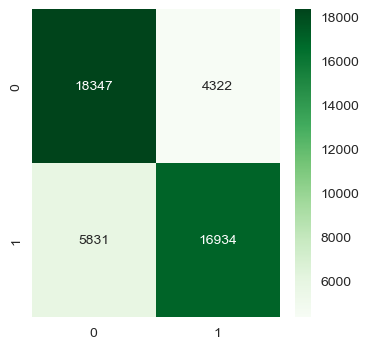

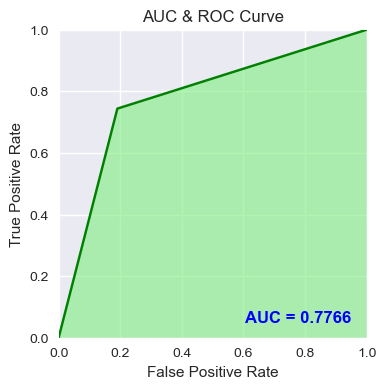

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     22669
           1       0.80      0.74      0.77     22765

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434

Artifical neural network accuracy(in %): 77.65329929127965 %
F1 score for Artifical neural network is : 76.9360078144522 %


In [77]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="g", cmap="Greens")

auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


print(classification_report(y_test, y_pred))
print("Artifical neural network accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Artifical neural network is :",f1_score(y_test, y_pred)*100, "%")

## RESULT FROM ARTIFICAL NEURAL NETWORK

## FINDINGS:

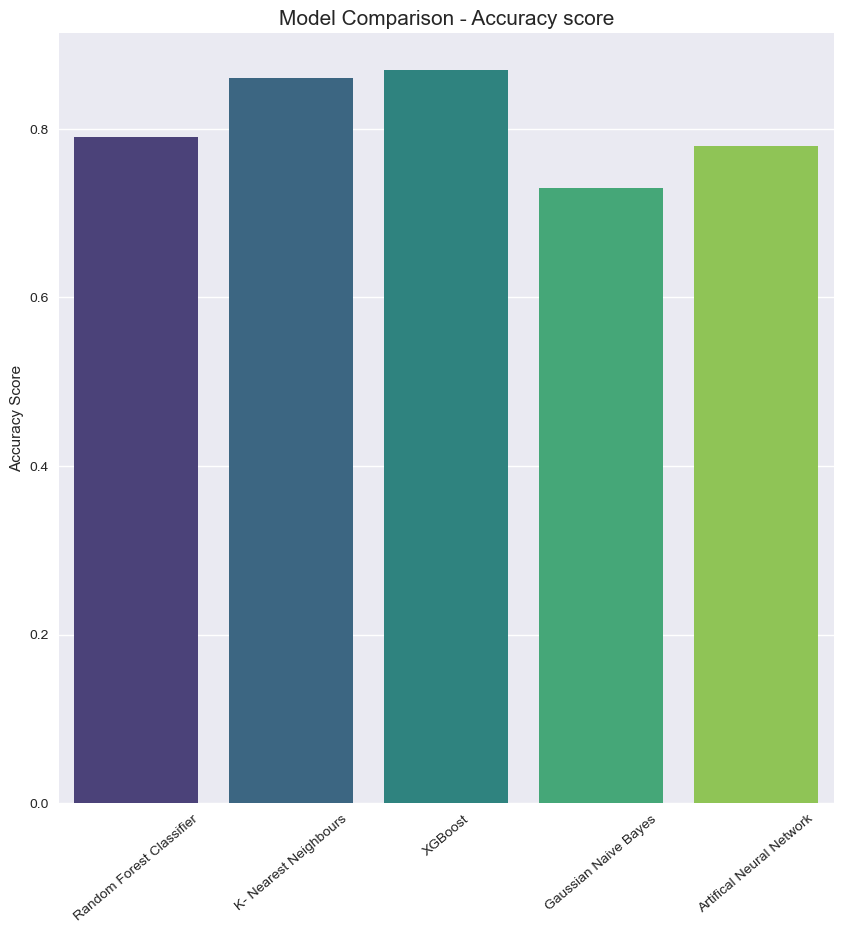

In [78]:
# Visualising using bar chart to compare models Accuracy- score
x = ["Random Forest Classifier",
     "K- Nearest Neighbours","XGBoost",
     "Gaussian Naive Bayes", "Artifical Neural Network"]

y = [0.79, 0.86, 0.87, 0.73, 0.78]

plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("Accuracy Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - Accuracy score", fontsize=15);

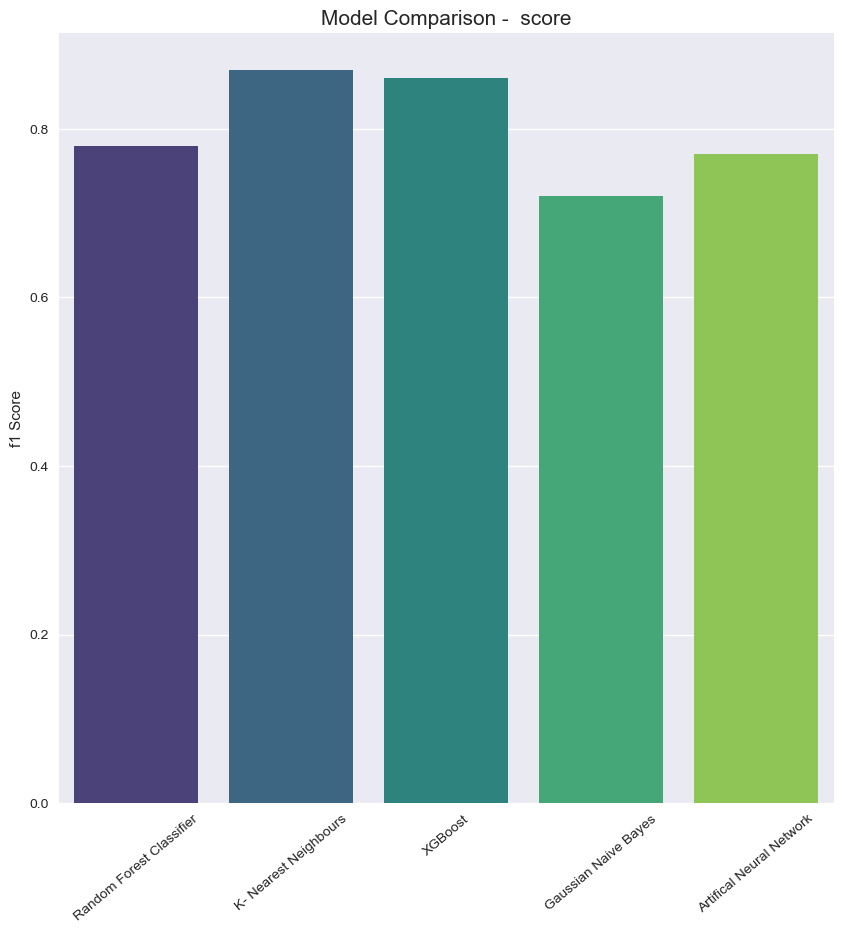

In [79]:
# Visualising using bar chart to compare models f1- score
x = ["Random Forest Classifier",
     "K- Nearest Neighbours","XGBoost",
     "Gaussian Naive Bayes", "Artifical Neural Network"]

y = [0.78, 0.87, 0.86, 0.72, 0.77]

plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("f1 Score")
plt.xticks(rotation=40)
plt.title("Model Comparison -  score", fontsize=15);


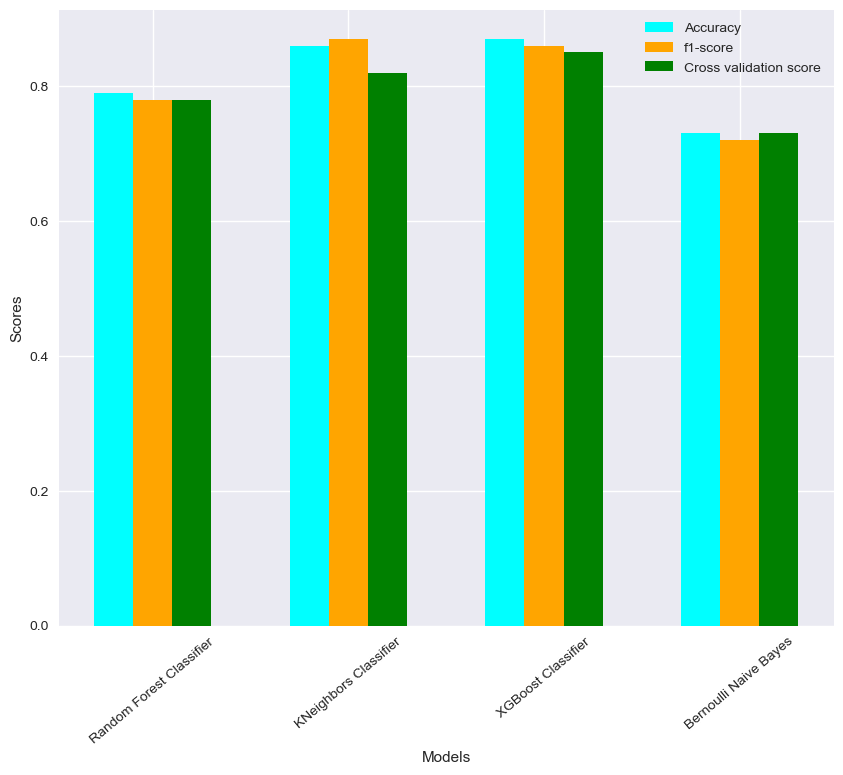

In [80]:
#Comparing  accuracy, f1- score and cross validation score of each models
x = np.arange(4)
y1 = [0.79, 0.86, 0.87, 0.73]
y2 = [0.78, 0.87, 0.86, 0.72]
y3 = [0.78, 0.82, 0.85, 0.73]
width = 0.2
  
# plot data in grouped manner of bar type
plt.figure(figsize=(10,8))
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Random Forest Classifier', 'KNeighbors Classifier', 'XGBoost Classifier', 'Bernoulli Naive Bayes'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.xticks(rotation=40)
plt.legend(["Accuracy", "f1-score", "Cross validation score"])
plt.show()

## CONCLUSION: